# Dimensionality Reduction and Binary Classification

* For this task, you need to handle high-dimensional data and then successfully apply an appropriate classification model.

> **The tasks are designed to give you space for creativity. Figuring out _how exactly_ you will solve the task is an important part of the assignment, and originality or ingenuity will also be evaluated!**

Use `Markdown` cells to explain your process. Points will be deducted for lack of clarity.

## Data Source

* The data source files are `train.csv` and `evaluate.csv`.
* These are 28x28 pixel grayscale images obtained from the [Fashion MNIST dataset](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
* The `train.csv` file contains the training data.
* The target (dependent) variable is named **label**.
* The `evaluate.csv` file contains test data without actual label values.

## Instructions for Completion

**Assignment Points**, for which you will earn **25 points** for (honest) completion:
* Load the data from `train.csv` into the notebook. Split it appropriately into subsets for training, model comparison, and subsequent prediction of the final model’s performance.
* Conduct a basic data exploration and discuss your observations. Display some of the images as well.
* Sequentially apply the models **SVM**, **Naive Bayes classifier**, and **LDA**, where for each:
  * Comment on the suitability of each model for this type of task.
  * Select key hyperparameters to tune (if the model has hyperparameters) and find their best values.
  * Experiment with data standardization/normalization.
  * For SVM, try at least two different kernel functions.
  * Properly comment on the results obtained.

* Sequentially apply the dimensionality reduction methods PCA and LLE, where for each:
  * Repeat the previous steps and try to improve the models.
  * Investigate which dimensionality is best for the performance of the final model.
  * Properly comment on the results obtained.

* From all the tested options, select the final model and estimate the accuracy you can expect on new data not previously available.

* Finally, load the evaluation data from the `evaluate.csv` file. Use the final model to compute predictions for this data (the dependent variable is not included). Create a `results.csv` file where the obtained predictions are saved in the **label** column and identifiers in the **ID** column. Submit this file as well (save it to the project alongside the notebook).

* Example of the first few rows of the `results.csv` file:

ID,label

0,0

1,1



In [1]:
import pandas as pd
import time
import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt
display(HTML("<style>.container { width:100% !important; }</style>"))

# Load train set
train_data = pd.read_csv('train.csv')
train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,1,0,0,0,0,0,0,0,0,0,...,208,122,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,75,11,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,106,103,76,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0,0,0,0,0,0,0,0,0,0,...,63,0,0,0,0,0,0,0,0,0
2396,1,0,0,0,0,0,0,0,1,0,...,91,24,0,0,0,0,0,0,0,0
2397,1,0,0,0,0,0,0,0,0,0,...,66,111,25,0,0,0,0,0,0,0
2398,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Unique labels 
train_data['label'].unique()

array([1, 0])

In [3]:
missing_values = train_data.isnull().sum()

# Check if there are any missing values at all
if missing_values.any():
    # Print the columns with missing values and their counts
    print("Missing values found in the following columns:")
    print(missing_values[missing_values > 0])
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [4]:
min_values = train_data.min()
max_values = train_data.max()

# Find the lowest and highest value across the entire DataFrame
lowest_value = min_values.min()
highest_value = max_values.max()

# Display results
print(f"The lowest value across all pixels is: {lowest_value}")
print(f"The highest value across all pixels is: {highest_value}")

The lowest value across all pixels is: 0
The highest value across all pixels is: 255


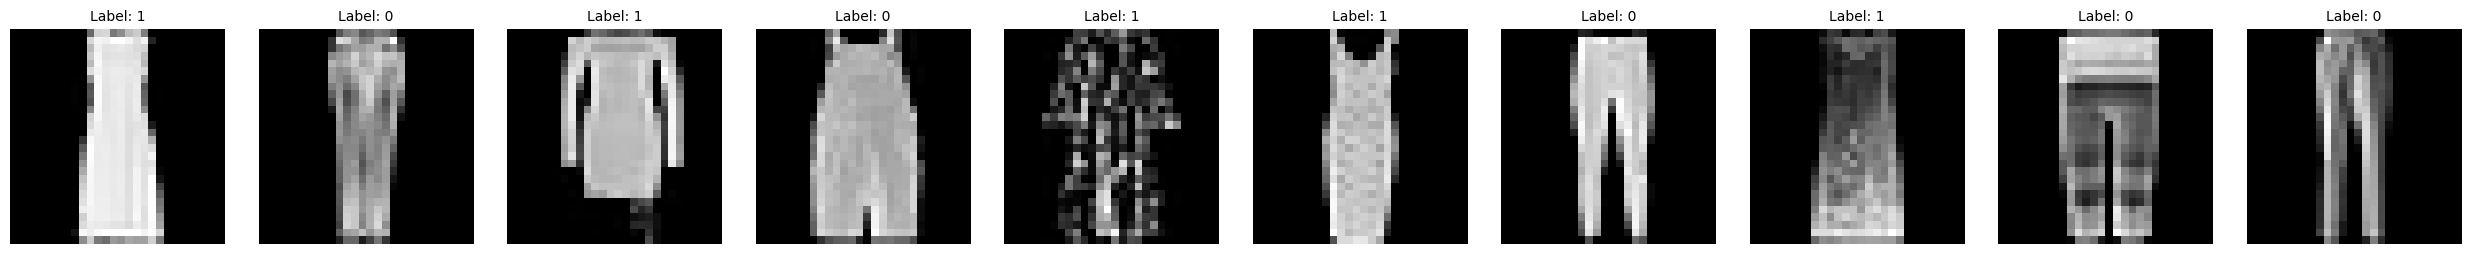

In [5]:
def draw_images_with_labels(data, num_images=10):
    """
    Draws the first `num_images` images contained in `data` with labels.
    
    Parameters:
    - data: A pandas DataFrame where each row is an image with pixel intensities and the first
            column is the label.
    - num_images: The number of images to draw.
    """
    # Extract labels from the first column
    labels = data.iloc[:, 0] if 'label' not in data.columns else data['label']
    
    # Drop the 'label' column to prepare data for visualization
    data_for_visualization = np.array(data.drop(data.columns[0], axis=1))
    
    # Number of images to display
    num_images = min(num_images, data_for_visualization.shape[0])
    
    # Set up the matplotlib figure and axes, based on the number of images
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 2.5, 2.5))
    if num_images == 1:
        axes = [axes]  # Make sure axes is iterable for the case of a single image
    
    for i, ax in enumerate(axes):
        # Reshape the row into 28x28 to get the image
        img = data_for_visualization[i].reshape(28, 28)
        
        # Display an image
        ax.imshow(img, cmap='gray', interpolation='none')
        ax.axis('off')
        
        # Display the label near the image
        ax.set_title(f'Label: {labels.iloc[i]}', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
# Assuming train_data is a pandas DataFrame with your images and labels
draw_images_with_labels(train_data, num_images=10)

Based on the pictures, I can infer that the goal of our future model is to efficiently distinguish between dresses and pants.

In [6]:
from sklearn.model_selection import train_test_split

# Dividing a data into train, validation and test sets

random_seed = 42

X = train_data.drop(columns = ['label'])

Xtrain, Xval, ytrain, yval = train_test_split(train_data.drop(columns = ['label']), train_data['label'], test_size=0.4, random_state=random_seed)

Xval, Xtest, yval, ytest = train_test_split(Xval, yval, test_size=0.3, random_state=random_seed)

In [7]:
def evaluate_models(X_train, y_train, X_val, y_val, pipelines):
    """
    Fits models defined in pipelines, predicts validation set, and plots confusion matrices.
    
    Parameters:
    - X_train: Features for the training set
    - y_train: Labels for the training set
    - X_val: Features for the validation set
    - y_val: Labels for the validation set
    - pipelines: Dictionary of scikit-learn pipeline objects
    """
    for name, pipeline in pipelines.items():
        # Fit the model
        pipeline.fit(X_train, y_train)
        
        # Predict the validation set
        y_pred = pipeline.predict(X_val)
        
        # Print accuracy
        accuracy = accuracy_score(y_val, y_pred)
        print(f'Accuracy score (validation) for {name}: {accuracy:.4f}')
        
        # Compute confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        
        # Visualize confusion matrix
        plt.figure(figsize=(5, 3))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix for {name}')
        plt.show()

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

# Create scaled data to facilitate the search for the best parameters for models through cross-validation.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain)
X_val_scaled = scaler.fit_transform(Xval)
X_test_scaled = scaler.fit_transform(Xtest)

Accuracy score (validation) for svm linear min_max: 0.9643


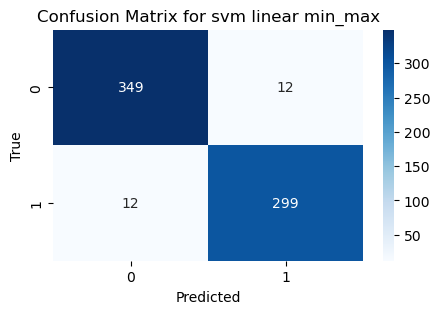

Accuracy score (validation) for svm linear standard_scaler: 0.9554


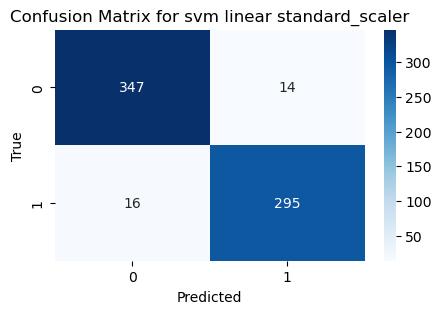

Accuracy score (validation) for svm linear Normalizer: 0.9643


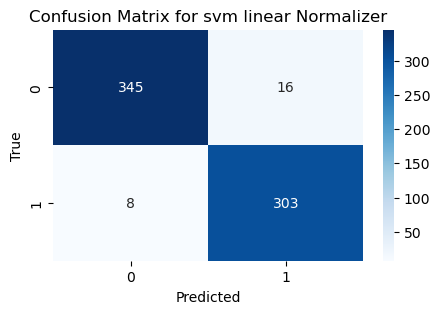

In [9]:
# Create different pipelines
pipelines_svm_linear = {
    'svm linear min_max': make_pipeline(MinMaxScaler(), SVC(kernel='linear')),
    'svm linear standard_scaler': make_pipeline(StandardScaler(), SVC(kernel='linear')),
    'svm linear Normalizer': make_pipeline(Normalizer(), SVC(kernel='linear'))
}

evaluate_models(Xtrain, ytrain, Xval, yval, pipelines_svm_linear)

In [10]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

# Define the best C and gamma for SVM with rbf kernel 

st = time.time()
# Hyperparameters ranges set on a logarithmic scale
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
kernel = ['rbf']

# Parameter grid for GridSearchCV
param_grid = dict(gamma=gamma_range, C=C_range, kernel=kernel)

# Cross-validator with stratified shuffle splits
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# GridSearchCV instantiation and fitting
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_train_scaled, ytrain)

et = time.time()
print(f"SVM - found best parameters for the rbf kernel in {et - st : .03f}s")

# Printing the best parameters and the corresponding score
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

SVM - found best parameters for the rbf kernel in  374.889s
The best parameters are {'C': 100.0, 'gamma': 0.0001, 'kernel': 'rbf'} with a score of 0.98


In [11]:
# The best parameters for svm with rbf kernel
grid.best_params_
C = grid.best_params_['C']
gamma = grid.best_params_['gamma']
kernel = grid.best_params_['kernel']

Accuracy score (validation) for svm rbf min_max: 0.9702


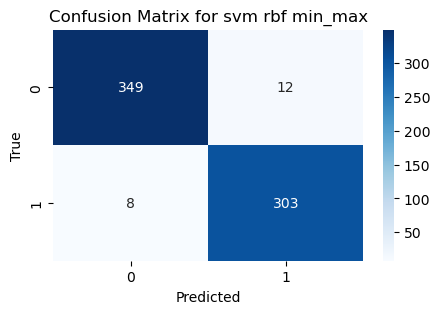

Accuracy score (validation) for svm rbf standard_scaler: 0.9643


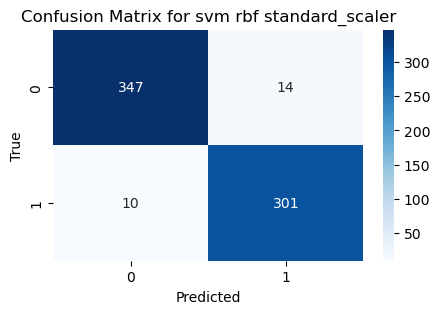

Accuracy score (validation) for svm rbf Normalizer: 0.9435


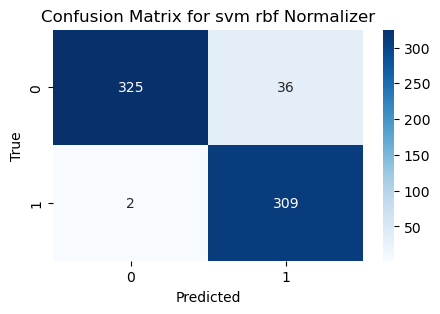

In [12]:
# Create different pipelines
pipelines_svm_rbf = {
    'svm rbf min_max': make_pipeline(MinMaxScaler(), SVC(C=C, gamma=gamma, kernel=kernel)),
    'svm rbf standard_scaler': make_pipeline(StandardScaler(), SVC(C=C, gamma=gamma, kernel=kernel)),
    'svm rbf Normalizer': make_pipeline(Normalizer(), SVC(C=C, gamma=gamma, kernel=kernel))
}

evaluate_models(Xtrain, ytrain, Xval, yval, pipelines_svm_rbf)

Accuracy score (validation) for gnb min_max: 0.9435


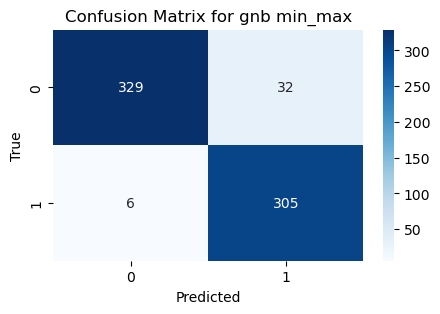

Accuracy score (validation) for gnb standard_scaler: 0.9449


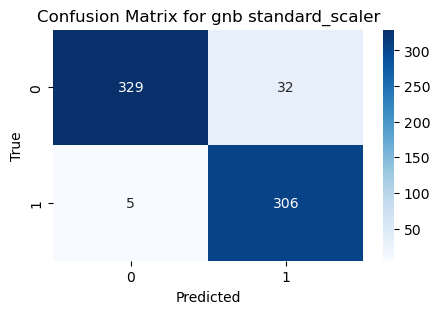

Accuracy score (validation) for gnb Normalizer: 0.9271


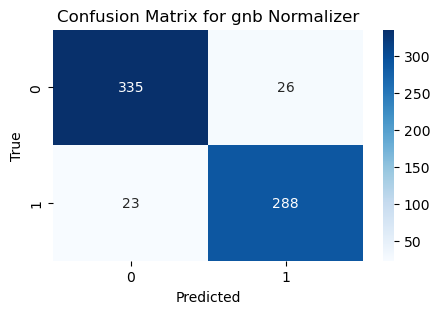

In [13]:
from sklearn.naive_bayes import GaussianNB

# Gaissian Naive Bayes

pipelines_gnb = {
    'gnb min_max': make_pipeline(MinMaxScaler(), GaussianNB()),
    'gnb standard_scaler': make_pipeline(StandardScaler(), GaussianNB()),
    'gnb Normalizer': make_pipeline(Normalizer(), GaussianNB())
}

evaluate_models(Xtrain, ytrain, Xval, yval, pipelines_gnb)

Accuracy score (validation) for lda min_max: 0.9241


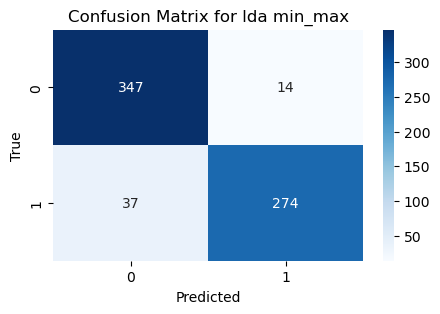

Accuracy score (validation) for lda standard_scaler: 0.9241


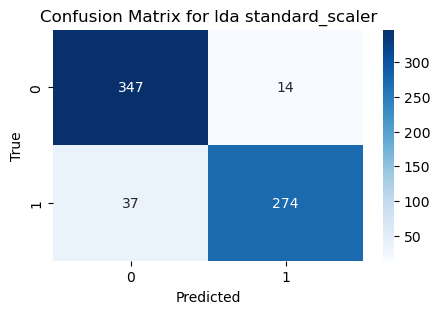

Accuracy score (validation) for lda Normalizer: 0.9241


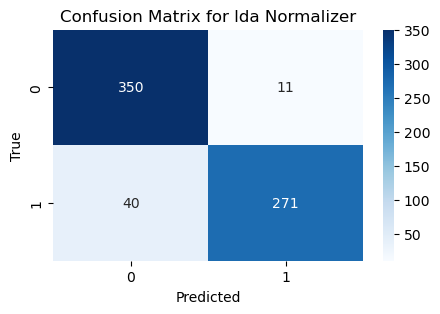

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Linear Discriminant Analysis

pipelines_lda = {
    'lda min_max': make_pipeline(MinMaxScaler(), LDA()),
    'lda standard_scaler': make_pipeline(StandardScaler(), LDA()),
    'lda Normalizer': make_pipeline(Normalizer(), LDA())
}

evaluate_models(Xtrain, ytrain, Xval, yval, pipelines_lda)

Processing PCA with 1 components...
Processing PCA with 11 components...
Processing PCA with 21 components...
Processing PCA with 31 components...
Processing PCA with 41 components...
Processing PCA with 51 components...
Processing PCA with 61 components...
Processing PCA with 71 components...
Processing PCA with 81 components...
Processing PCA with 91 components...


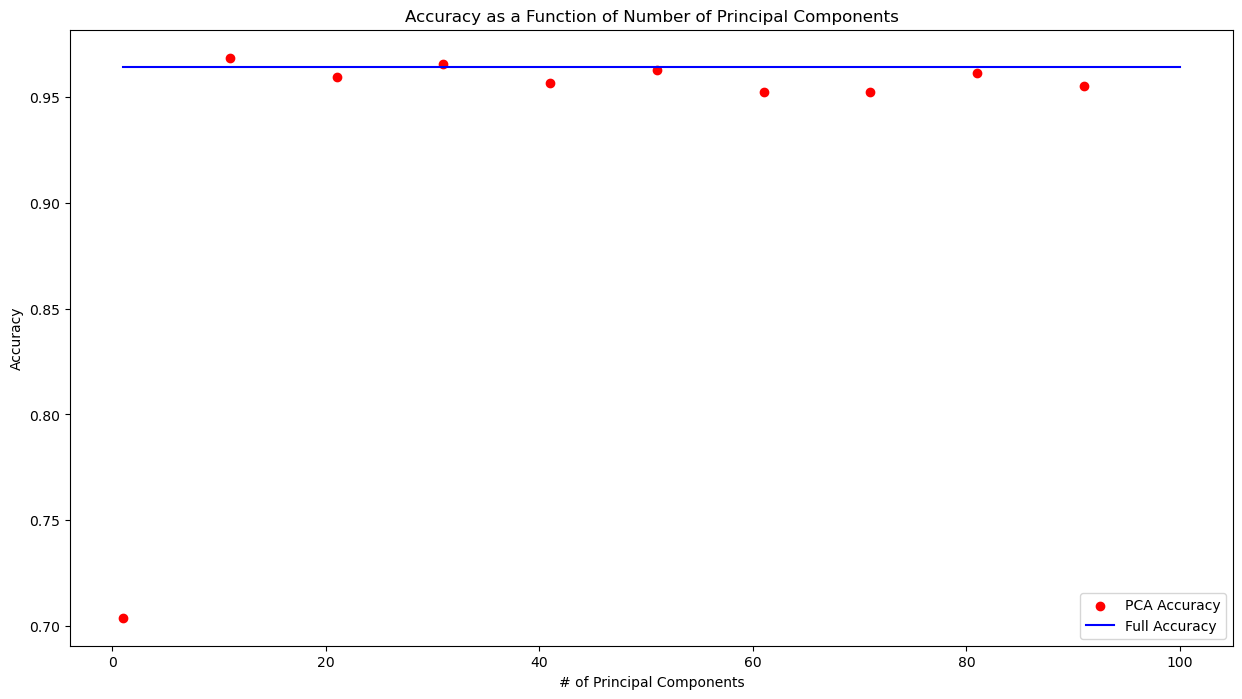

Best number of components: 11 with an accuracy of 0.9688


In [15]:
from sklearn.decomposition import IncrementalPCA

# The function for identifying the optimal number of components for PCA
def efficient_svm_with_pca(Xtrain, Xval, ytrain, yval, start_component, max_components, step_size):
    # Initial accuracy calculation for comparison
    svm_full = make_pipeline(MinMaxScaler(), SVC(kernel='linear'))
    svm_full.fit(Xtrain, ytrain)
    full_acc = accuracy_score(yval, svm_full.predict(Xval))

    # Initialize Incremental PCA
    ipca = IncrementalPCA(n_components=max_components)
    ipca.fit(Xtrain)
    Ttrain = ipca.transform(Xtrain)
    Tval = ipca.transform(Xval)
    
    ACC_PCA = []

    # Only compute PCA once, then slice for different component sizes
    for n in range(start_component, max_components + 1, step_size):
        print(f"Processing PCA with {n} components...")
        Tsub = Ttrain[:, :n]
        Tsubval = Tval[:, :n]
        svm = SVC(kernel='linear')
        svm.fit(Tsub, ytrain)
        ACC_PCA.append(svm.score(Tsubval, yval))

    # Convert accuracy list to numpy array
    ACC_PCA = np.array(ACC_PCA)
    best_index = np.argmax(ACC_PCA)
    best_n_components = best_index * step_size + start_component

    # Plotting results
    plt.subplots(1, 1, figsize=(15, 8))
    components_range = np.arange(start_component, max_components + 1, step_size)
    plt.scatter(components_range, ACC_PCA, c='red', label='PCA Accuracy')
    plt.plot([start_component, max_components], [full_acc, full_acc], 'b-', label='Full Accuracy')
    plt.title("Accuracy as a Function of Number of Principal Components")
    plt.xlabel('# of Principal Components')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    print(f"Best number of components: {best_n_components} with an accuracy of {ACC_PCA[best_index]:.4f}")

    return ACC_PCA, components_range, best_n_components, ACC_PCA[best_index]


max_components = 100  # Set the maximum number of PCA components to consider
step_size = 10       # Define the step size for incrementing the number of components
start_component = 1  # Start component range
acc_results, components_tested, best_components, best_accuracy = efficient_svm_with_pca(Xtrain, Xval, ytrain, yval, start_component, max_components, step_size)

Processing PCA with 8 components...
Processing PCA with 9 components...
Processing PCA with 10 components...
Processing PCA with 11 components...
Processing PCA with 12 components...
Processing PCA with 13 components...
Processing PCA with 14 components...
Processing PCA with 15 components...
Processing PCA with 16 components...
Processing PCA with 17 components...
Processing PCA with 18 components...


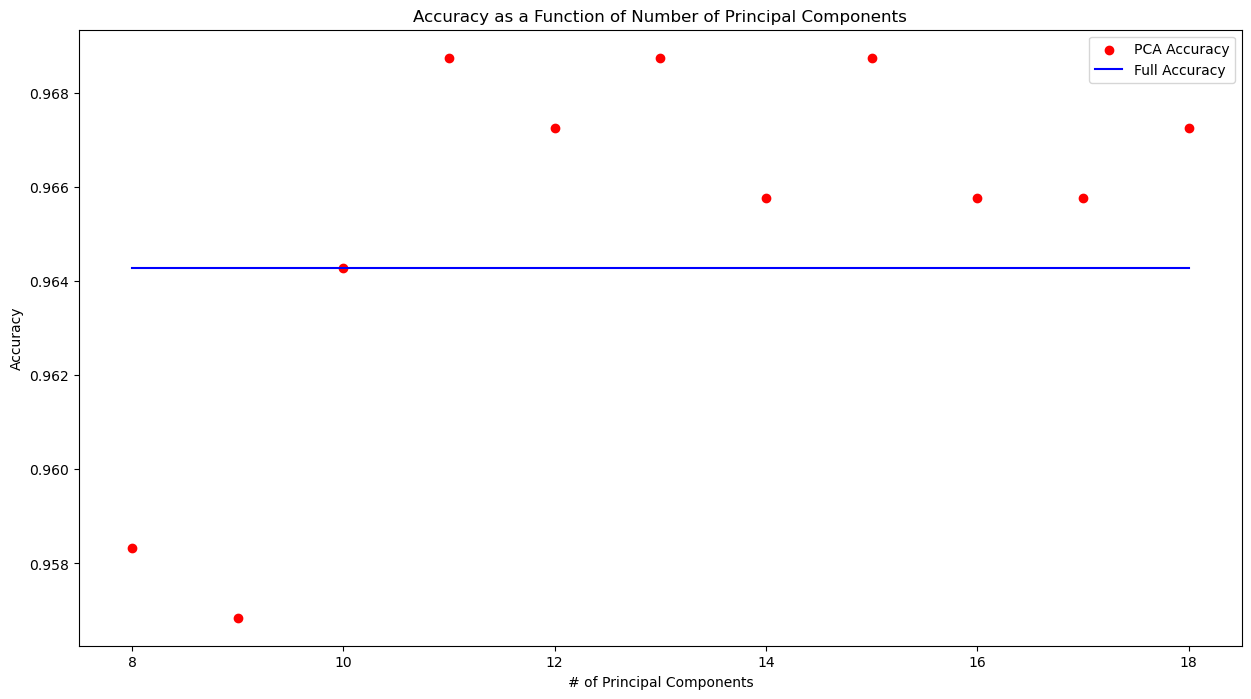

Best number of components: 11 with an accuracy of 0.9688
Best number of components: 11 with an accuracy of 0.9688


In [16]:
max_components = 18  # Set the maximum number of PCA components to consider
step_size = 1      # Define the step size for incrementing the number of components
start_component = 8 # Start component range
acc_results, components_tested, best_components, best_accuracy = efficient_svm_with_pca(Xtrain, Xval, ytrain, yval, start_component, max_components, step_size)

print(f"Best number of components: {best_components} with an accuracy of {best_accuracy:.4f}")

After determining the optimal number of components using PCA, we can apply this to our models. Based on previous results, we can conclude that MinMax preprocessing yields the highest accuracy.

Accuracy score (validation) for svm linear min_max: 0.9613


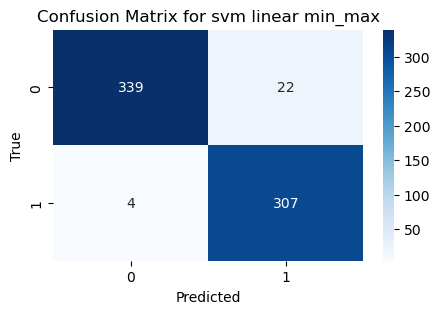

Accuracy score (validation) for svm rbf min_max: 0.9420


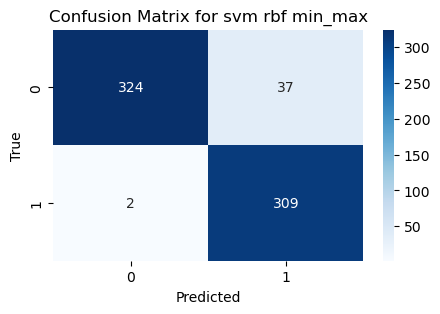

Accuracy score (validation) for GNB min max: 0.9405


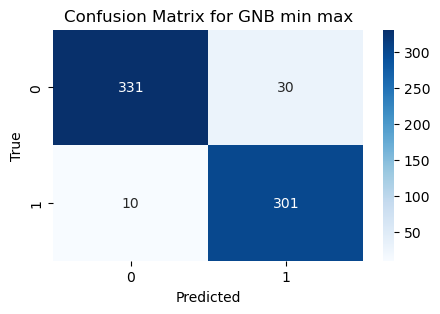

Accuracy score (validation) for LDA min max: 0.9613


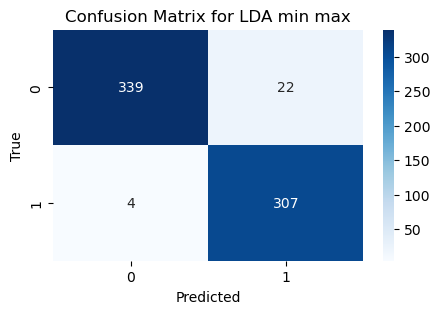

In [17]:
ipca = IncrementalPCA(n_components=best_components)
ipca.fit(Xtrain)
Ttrain = ipca.transform(Xtrain)
Tval = ipca.transform(Xval)
Ttest = ipca.transform(Xtest)


# Create different pipelines
pipelines_all_models_min_max = {
    'svm linear min_max': make_pipeline(MinMaxScaler(), SVC(kernel='linear')),
    'svm rbf min_max': make_pipeline(MinMaxScaler(), SVC(C=C, gamma=gamma, kernel='rbf')),
    'GNB min max': make_pipeline(MinMaxScaler(), GaussianNB()),
    'LDA min max': make_pipeline(MinMaxScaler(), LDA())
}

evaluate_models(Ttrain, ytrain, Tval, yval, pipelines_all_models_min_max)

Processing LLE with 1 components...
Processing LLE with 11 components...
Processing LLE with 21 components...
Processing LLE with 31 components...
Processing LLE with 41 components...
Processing LLE with 51 components...
Processing LLE with 61 components...
Processing LLE with 71 components...
Processing LLE with 81 components...
Processing LLE with 91 components...


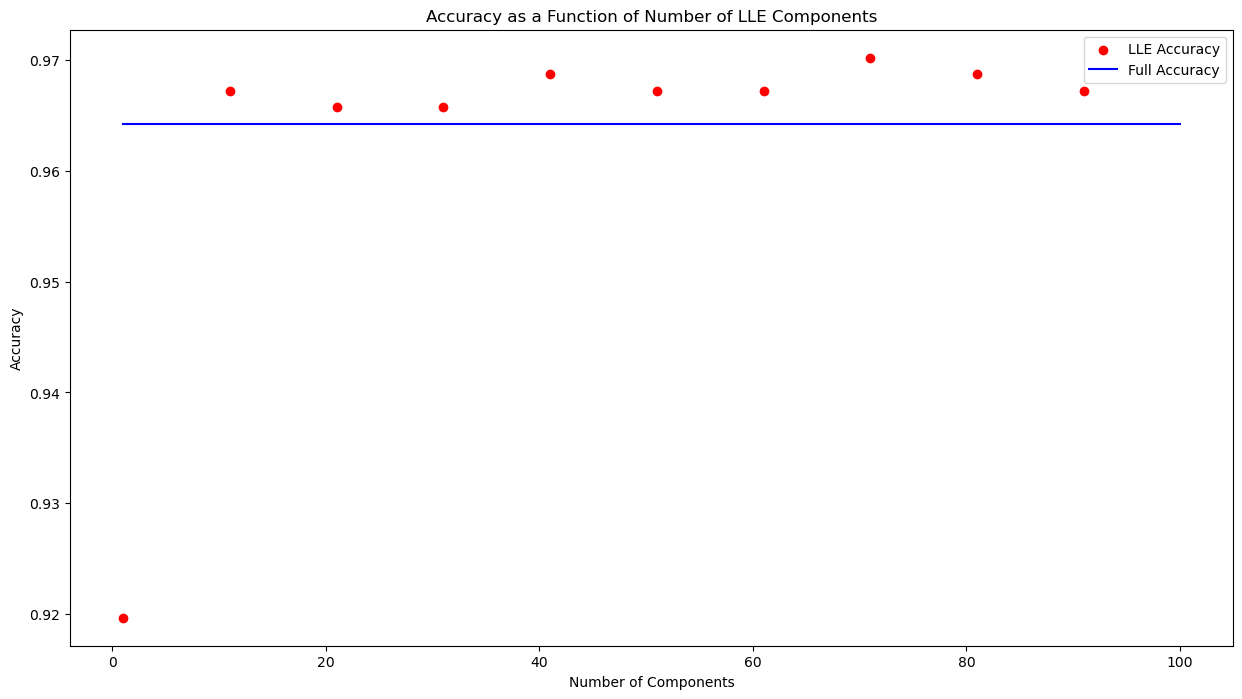

Maximum accuracy = 0.9702 for 71 components.
Best number of components: 71 with an accuracy of 0.9702


In [18]:
from sklearn.manifold import LocallyLinearEmbedding

# The function for identifying the optimal number of components for LLE
def evaluate_lle_svm(Xtrain, Xval, ytrain, yval, start_component, max_components, step_size):
    ACC_LLE = []

    # Evaluate SVM with original features to set a baseline accuracy
    svm_full = make_pipeline(MinMaxScaler(), SVC(kernel='linear'))
    svm_full.fit(Xtrain, ytrain)
    full_acc = accuracy_score(yval, svm_full.predict(Xval))

    # Fit and evaluate LLE and SVM for a range of component sizes
    for n in range(start_component, max_components + 1, step_size):
        print(f"Processing LLE with {n} components...")
        lle = LocallyLinearEmbedding(n_components=n, n_neighbors=10)
        try:
            Tsub = lle.fit_transform(Xtrain)
            Tsubval = lle.transform(Xval)
        except Exception as e:
            print(f"Failed to process LLE with {n} components: {e}")
            continue
        
        svm = SVC(kernel='linear')
        svm.fit(Tsub, ytrain)
        accuracy = svm.score(Tsubval, yval)
        ACC_LLE.append(accuracy)

    # Convert list to numpy array for easier handling
    if ACC_LLE:  # Ensure list is not empty
        ACC_LLE = np.array(ACC_LLE)
        best_index = np.argmax(ACC_LLE)
        best_n_components = best_index * step_size + start_component
        max_accuracy = ACC_LLE[best_index]
    else:
        best_n_components = None
        max_accuracy = None

    # Plotting results
    if ACC_LLE.size:
        component_range = range(start_component, max_components + 1, step_size)[:len(ACC_LLE)]
        plt.subplots(1, 1, figsize=(15, 8))
        plt.scatter(component_range, ACC_LLE, c='red', label='LLE Accuracy')
        plt.plot([start_component, max_components], [full_acc, full_acc], 'b-', label='Full Accuracy')
        plt.title("Accuracy as a Function of Number of LLE Components")
        plt.xlabel('Number of Components')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
        print(f"Maximum accuracy = {max_accuracy:.4f} for {best_n_components} components.")
    else:
        print("No successful LLE computations to plot.")

    return ACC_LLE, best_n_components, max_accuracy

max_components = 100  # Set the maximum number of LLE components to consider
step_size = 10        # Define the step size for incrementing the number of components
start_component = 1   # Start component range
acc_results, best_components, best_accuracy = evaluate_lle_svm(Xtrain, Xval, ytrain, yval, start_component, max_components, step_size)

print(f"Best number of components: {best_components} with an accuracy of {best_accuracy:.4f}")

Processing LLE with 60 components...
Processing LLE with 61 components...
Processing LLE with 62 components...
Processing LLE with 63 components...
Processing LLE with 64 components...
Processing LLE with 65 components...
Processing LLE with 66 components...
Processing LLE with 67 components...
Processing LLE with 68 components...
Processing LLE with 69 components...
Processing LLE with 70 components...
Processing LLE with 71 components...
Processing LLE with 72 components...
Processing LLE with 73 components...
Processing LLE with 74 components...
Processing LLE with 75 components...
Processing LLE with 76 components...
Processing LLE with 77 components...
Processing LLE with 78 components...
Processing LLE with 79 components...
Processing LLE with 80 components...


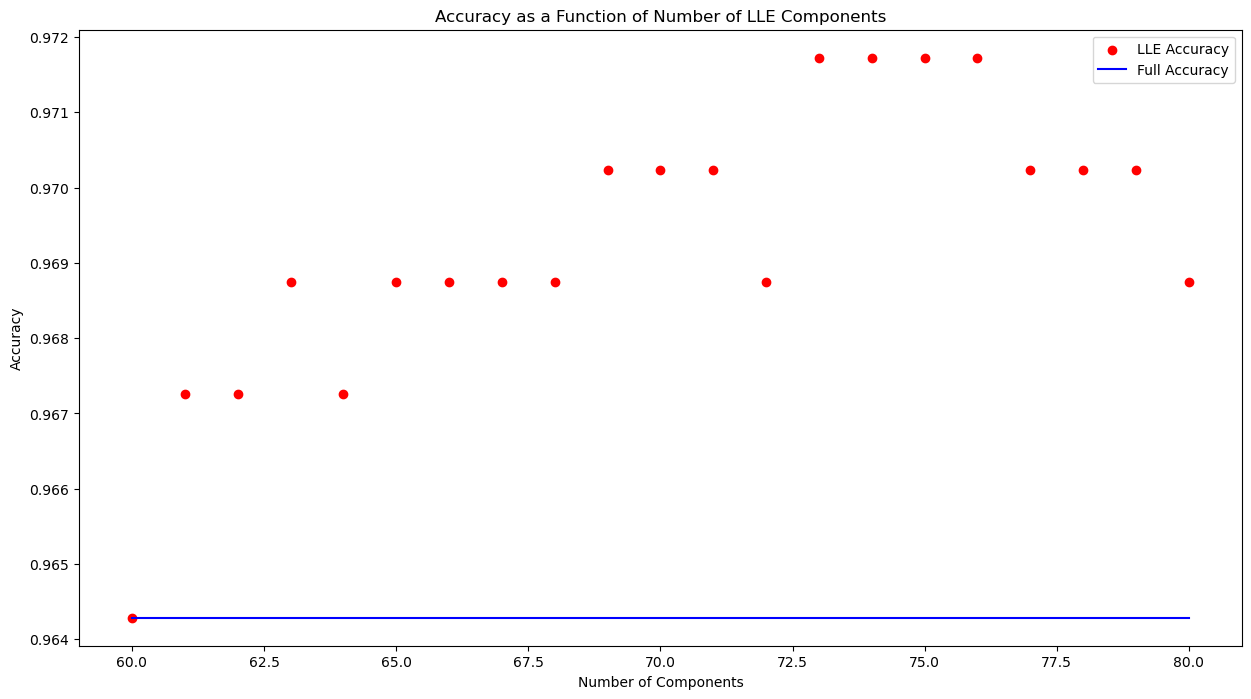

Maximum accuracy = 0.9717 for 73 components.
Best number of components: 73 with an accuracy of 0.9717


In [19]:
max_components = 80  # Set the maximum number of LLE components to consider
step_size = 1       # Define the step size for incrementing the number of components
start_component = 60 # Start component range
acc_results, best_components, best_accuracy = evaluate_lle_svm(Xtrain, Xval, ytrain, yval, start_component, max_components, step_size)

print(f"Best number of components: {best_components} with an accuracy of {best_accuracy:.4f}")

After determining the optimal number of components using LLE, we can apply this to our models. Based on previous results, we can conclude that MinMax preprocessing yields the highest accuracy.

Accuracy score (validation) for svm linear min_max: 0.9702


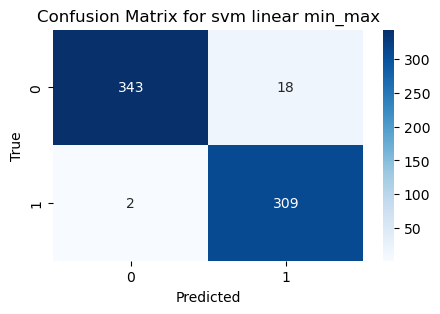

Accuracy score (validation) for svm rbf min_max: 0.5387


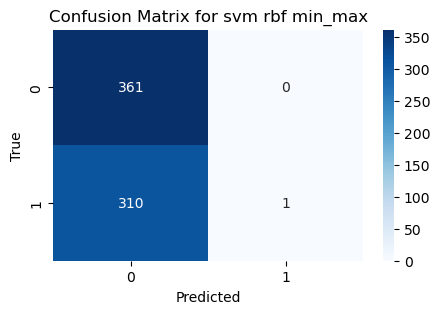

Accuracy score (validation) for GNB min max: 0.9390


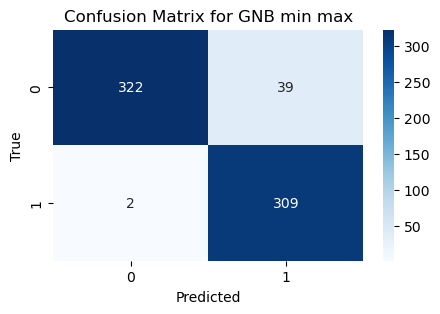

Accuracy score (validation) for LDA min max: 0.9717


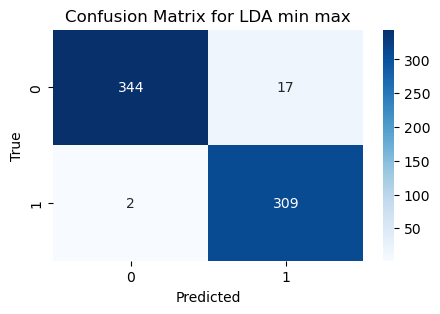

In [20]:
lle = LocallyLinearEmbedding(n_components=best_components, n_neighbors=10)
Tsubtrain = lle.fit_transform(Xtrain)
Tsubval = lle.transform(Xval)
Tsubtest = lle.transform(Xtest)


# Create different pipelines
pipelines_all_models_min_max = {
    'svm linear min_max': make_pipeline(MinMaxScaler(), SVC(kernel='linear')),
    'svm rbf min_max': make_pipeline(MinMaxScaler(), SVC(C=C, gamma=gamma, kernel='rbf')),
    'GNB min max': make_pipeline(MinMaxScaler(), GaussianNB()),
    'LDA min max': make_pipeline(MinMaxScaler(), LDA())
}

evaluate_models(Tsubtrain, ytrain, Tsubval, yval, pipelines_all_models_min_max)

Based on the validation set accuracy, we can define the final models to evaluate test accuracy:

LDA with LLE and MinMaxScaler (validation accuracy = 0.9717).

Accuracy score (test) for LDA min max: 0.975694


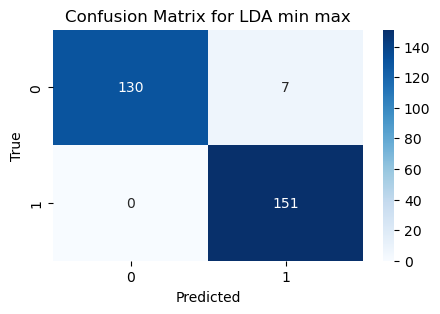

In [21]:
def evaluate_models_test(X_train, y_train, X_test, y_test, pipelines):
    """
    Fits models defined in pipelines, predicts validation set, and plots confusion matrices.
    
    Parameters:
    - X_train: Features for the training set
    - y_train: Labels for the training set
    - X_val: Features for the validation set
    - y_val: Labels for the validation set
    - pipelines: Dictionary of scikit-learn pipeline objects
    """
    for name, pipeline in pipelines.items():
        # Fit the model
        pipeline.fit(X_train, y_train)
        
        # Predict the validation set
        y_pred = pipeline.predict(X_test)
        
        # Print accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy score (test) for {name}: {accuracy:.6f}')
        
        # Compute confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        
        # Visualize confusion matrix
        plt.figure(figsize=(5, 3))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix for {name}')
        plt.show()
        
# Create different pipelines
pipelines_lle = {
    'LDA min max': make_pipeline(MinMaxScaler(), LDA())
}

evaluate_models_test(Tsubtrain, ytrain, Tsubtest, ytest, pipelines_lle)

In [22]:
model = make_pipeline(MinMaxScaler(), LDA())
model.fit(Tsubtrain, ytrain)

# load evaluated data
evaluate_data = pd.read_csv('evaluate.csv')

# transform features
X_evaluate = lle.transform(evaluate_data.drop('ID', axis=1))

# generate result file
results = pd.DataFrame({
    'ID': evaluate_data['ID'],
    'label': model.predict(X_evaluate)
})
results.to_csv('results.csv', index=False)